# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import exists
import os
from nap import *

# Data wrangling

### Resources used

In [2]:
# Files:
## New pickle files to process and to push to firebase
push_these_pickles_to_firebase_list = [] # PICKLES FILES TO PUSH TO THE FIREBASE HERE 

## Pickle files to load for this experiment
pickles = data_wrangler.generate_pickles(path_to_data='data/FULLSET',
                            letters_boundaries = ('A','H'),
                            number_boundaries= (1,10),
                            add_pickles=['C5_q40', 'C5_bt2v2343','C5_bt2343_q40','C5_Harrish'] + push_these_pickles_to_firebase_list,
                            remove_pickles=['C3','C10','D10','E10','F10','G10','H10', 'E4'])

push_these_pickles_to_firebase = {k: v for k, v in pickles.items() if k in push_these_pickles_to_firebase_list}

## Data files paths
json_file = 'data/db.json'
deltaG_brackets_file = 'data/delta_g_plus_bracket_q1.csv'

## Constants
min_bases_cov = 1000 
user = 'Yves'

### Load the data

In [3]:
# If the user gives some new pickles files, push them to the firebase, then pull the entire firebase
if len(push_these_pickles_to_firebase):
    data_wrangler.push_pickles_to_firebase(pickles = push_these_pickles_to_firebase,
                                            deltaG_brackets_file = deltaG_brackets_file,
                                            min_bases_cov = 1000, 
                                            user=user)
    if exists(json_file):
        os.remove(json_file)

In [4]:

# If not local copy of firebase, pull the firebase, else, load your copy
if not exists(json_file):
    if not exists('data'):
        os.mkdir('data')
    df_rough = data_wrangler.load_data_from_firebase(tubes = pickles.keys(), user=user)
    data_wrangler.dump_dict_json(JSONFileDict=json_file,
                                 df=df_rough)
else:
    df_rough = data_wrangler.load_dict_json(json_file)

Load from dict-type JSON file
Done!


### Clean and reformat the dataset. 
`df` is used for the analysis. Each of the construct have above 1000 reads for each tube.     
`df_full` is used for quality quality analysis. It has all constructs above 1000 valid reads for each tube individually.

In [5]:
df, df_full = turner_overthrow.clean_dataset(df_rough=df_rough,
                                             tubes=pickles.keys(), 
                                             min_bases_cov=min_bases_cov)

/home/ymdt/NAP/nap.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['tubes_covered'].loc[construct[1].index] = construct[1]['sequence'].count()


30 constructs were dropped because deltaG was 'void'
64 constructs have more than 1000 reads for each base of their var part on each tube


# Data quality analysis

In [6]:
## Select - or not - to use this part
data_quality_analysis = True

### Show the tube's quantity of valid structures (good indicator of the tube's quality)

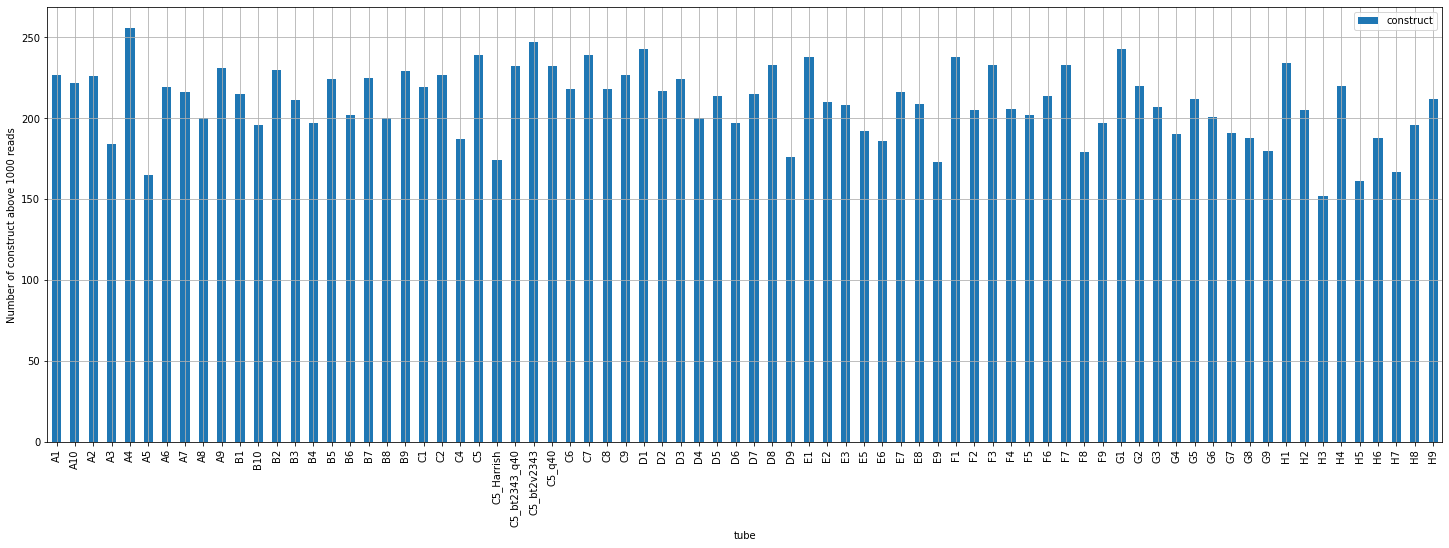

In [7]:
if data_quality_analysis:
    plot.valid_construct_per_tube(df=df_full,
                              min_bases_cov=min_bases_cov)

### Show the tube coverage distribution

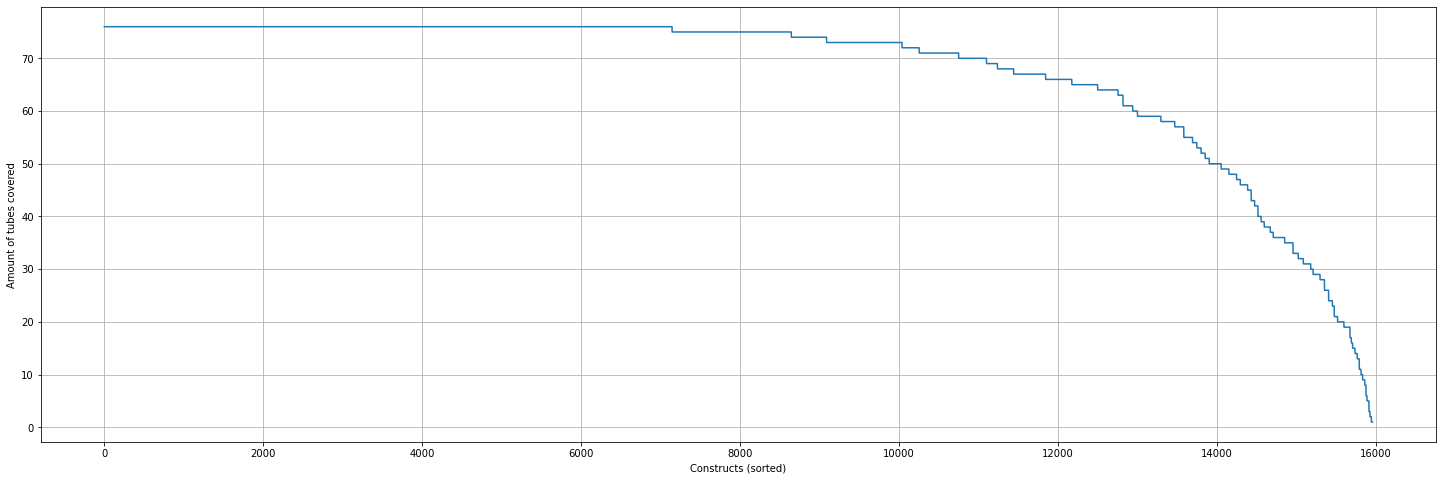

In [8]:
if data_quality_analysis:
    plot.tube_coverage_distribution(df=df_full)

### Plot the base coverage per construct distribution

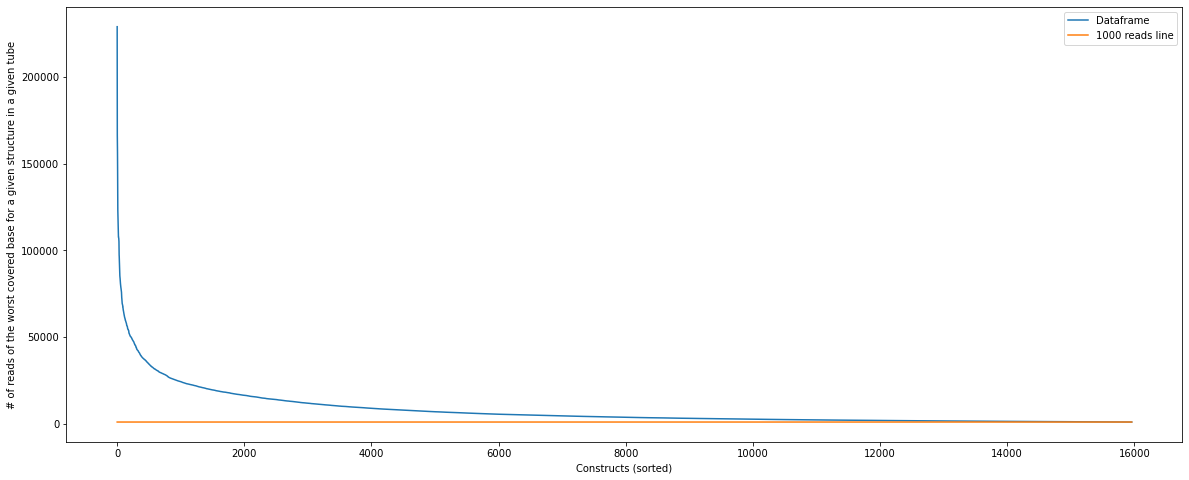

In [9]:
if data_quality_analysis:
    plot.base_coverage_for_all_constructs(df=df_full, 
                                      min_bases_cov=min_bases_cov)

### Sanity-check construct-wise base coverage plots
Plot randomly picked sequences to check the quality of the data.

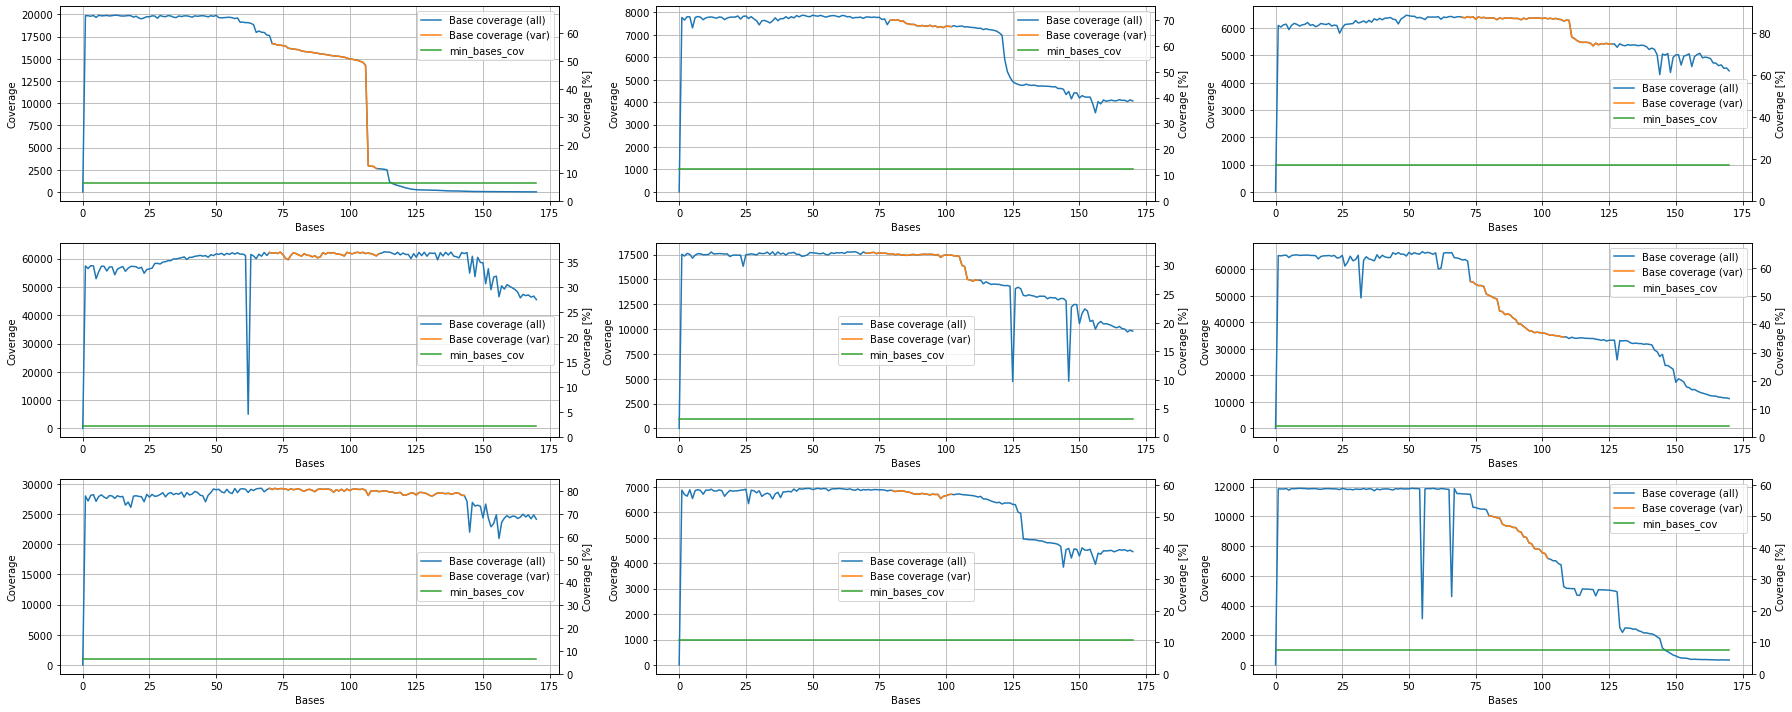

In [22]:
if data_quality_analysis:
    plot.random_base_coverage_plot_wise(df=df, 
                                    min_bases_cov=min_bases_cov)

### Heatmap of the var part coverage

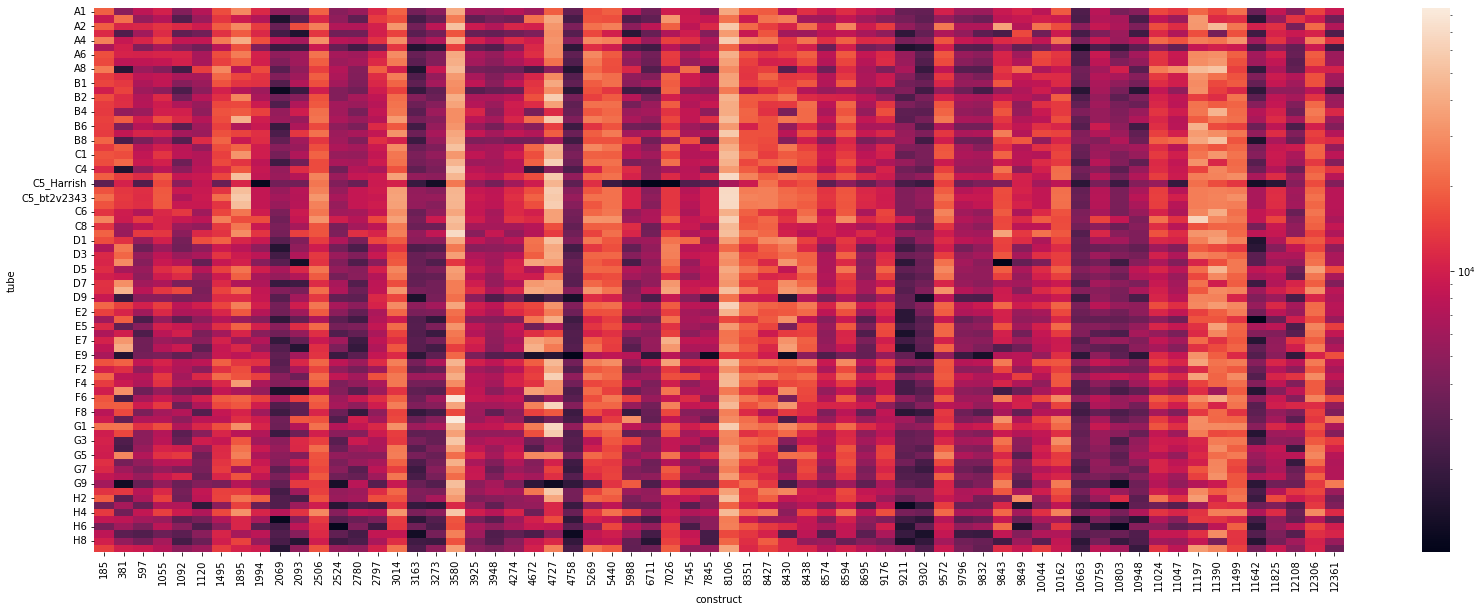

In [10]:
if data_quality_analysis:
    plot.heatmap(df = df, 
             column="cov_bases_var")

### Heatmap of the second half coverage

In [ ]:
if data_quality_analysis:
    plot.heatmap(df = df, 
                column="cov_bases_sec_half")

# Data Analysis

### Define variables

In [ ]:
### EDIT INPUTS HERE
study = 'temperature'  
show_plots = False
constructs = df.construct.unique()
analyse = {'base_per_base_partition':False,
           'base_per_base_sequence': False,
           'deltaG': True,
           'tube_comparison':True,
           'columns_csv': True,
           'deltaG_construct': True
            }
# END OF EDIT ZONE

tubes_per_study = {'replicates':['C5','A4' , 'F4', 'A6', 'A7'],
                      'salt': ['A6','B6','C6','D6','E6'], 
                      'temperature':['D7','E7','F7','G7','H7','A8','B8','C8'], 
                      'C5_diff_processings': list(filter(lambda p: 'C5' in p, pickles)),
                      'magnesium':['F6', 'G6', 'H6', 'A7', 'B7', 'C7'],
                      '60 mM DMS kinestics':['D8', 'E8', 'F8', 'G8', 'H8', 'A9']
                      }

tubes = tubes_per_study[study]

### Big script to run every selected function

In [ ]:
utils.big_script(df=df, tubes=tubes, constructs=constructs, analyse=analyse, study=study)

### Explore the data
`utils.get_var_info(df=df, tube=tube, construct=construct)` gives information about the variable part of the given construct of a given tube.

In [ ]:
tube, construct = tubes[0], constructs[0]
#utils.get_var_info(df=df, tube=tube, construct=construct).xs((True, '0'),level=('paired','var_structure_comparison'))

### Mutation sequence-wise

`plot.mutation_rate(df, tube, construct, plot_type, index, normalize)` plots the mutation rate base-wise for a given construct of a given tube as a barplot. 
Arguments:
- `plot_type` :
    - `'sequence'` : each bar is colored w.r.t to the base of the original sequence.
    - `'partition'` : each bar shows the partition of into which bases this base mutates.
- `index`:
    - `'index'`: each base is identified with its position number
    - `'base'`: each base is identified with its type (A, C, G, T)

Partition type - non normalized

In [ ]:
for tube in tubes:
    for construct in constructs:
        plot.mutation_rate(df, tube, construct, plot_type='partition', index='base')  
        plot.save_fig(path=f"data/figs/date/{study}/mut_per_base/partition/{construct}/", 
                    title=f"base_per_base_partition_{tube}_{construct}")
        plt.close(not show_plots)

Sequence type

In [ ]:
for tube in tubes:
    for construct in constructs:
        plot.mutation_rate(df=df,
                           tube=tube,
                           construct=construct,
                           plot_type='sequence',
                           index='index')
        plot.save_fig(path=f"data/figs/date/{study}/mut_per_base/sequence/{construct}/", 
                    title=f"base_per_base_sequence_{tube}_{construct}")
        plt.close(not show_plots)

### DeltaG plots

In [ ]:
for tube in tubes:
    plot.deltaG(df=df, tube=tube)

    plot.save_fig(path=f"data/figs/date/{study}/deltaG/", 
             title=f"deltaG_{tube}")

    plt.close(not show_plots)

### Tubes comparison

In [ ]:
for construct in constructs:
        plot.compare_n_tubes(df, tubes, construct)
        plot.save_fig(path=f"data/figs/date/comparison/{study}", 
                      title=f"comparison_{study}_{construct}")
        plt.close(not show_plots)
        print(construct, end=' ')

### Save columns to a csv file

In [ ]:
utils.columns_to_csv(df=df,
                   tubes=tubes,
                   columns=['tube', 'construct','full_sequence','var_sequence','mut_bases','info_bases'],
                   title='about_{study}',
                   path='data/figs/date/{study}'
                   )

### Save construct vs deltaG 

In [ ]:
def deltaG_vs_construct_to_csv(df, title, path, tubes):
    full_path = utils.make_path(path)
    df[df['tube']==tubes[0]][['construct','var_deltaG','full_deltaG']].reset_index().drop(columns=['index']).to_csv(f"{full_path}/{title}")
    
deltaG_vs_construct_to_csv(df=df, title=f"deltaG_vs_construct.csv", path = f"data/figs/date", tubes=tubes)